In [2]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [4]:
import pandas as pd

from collections import Counter

import itertools

In [5]:
import sympy as sym

In [6]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "../src/main.py").load_module()

from main import *

In [7]:
import glob

columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

files = glob.glob("../two_bit_reactive/*csv")

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

df.to_csv("../two_bit_reactive_nash.csv")

In [10]:
colors = ["tab:orange", "tab:green", "tab:green"]

### Numerical Nash

In [11]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [123]:
df = pd.read_csv("../two_bit_reactive_nash.csv", index_col=0)

In [124]:
eq, noneq = seperate_equilibria_and_non(df)

#### The pure set of strategies we need to check 

In [125]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [18]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [19]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [20]:
counter

Counter({'N0': 49758,
         'N1': 42462,
         'N2': 26362,
         'N3': 24523,
         'N4': 29110,
         'N5': 25199,
         'N6': 27998,
         'N7': 30313})

In [21]:
labels = [f"N{i}" for i in range(0, 16)]

In [22]:
idx_sets = []

for i, j, k in list(itertools.combinations(labels, r=3)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j, k))

In [23]:
idx_sets

[('N0', 'N1', 'N6'),
 ('N0', 'N2', 'N6'),
 ('N0', 'N3', 'N6'),
 ('N0', 'N4', 'N6'),
 ('N0', 'N5', 'N6'),
 ('N0', 'N6', 'N7'),
 ('N0', 'N6', 'N8'),
 ('N0', 'N6', 'N9'),
 ('N0', 'N6', 'N10'),
 ('N0', 'N6', 'N11'),
 ('N0', 'N6', 'N12'),
 ('N0', 'N6', 'N13'),
 ('N0', 'N6', 'N14'),
 ('N0', 'N6', 'N15')]

Thus, N0 and N6 are enough to check for Nash.

In [24]:
N0 = [0, 0, 0, 0]
N6 = [0, 1, 1, 0]

In [126]:
def N0(p):
    return 2 * p[3] - 1

def N6(p):
    _, p2, p3, p4 = p
    return -(
        -(p2 ** 3) * p3 ** 3 * p4
        + 2 * p2 ** 3 * p3 ** 2 * p4
        - 2 * p2 ** 3 * p3 * p4
        + p2 ** 3 * p4
        + 2 * p2 ** 2 * p3 ** 4 * p4 ** 2
        - 2 * p2 ** 2 * p3 ** 4 * p4
        - 5 * p2 ** 2 * p3 ** 3 * p4 ** 2
        + 7 * p2 ** 2 * p3 ** 3 * p4
        + 7 * p2 ** 2 * p3 ** 2 * p4 ** 2
        - 12 * p2 ** 2 * p3 ** 2 * p4
        + p2 ** 2 * p3 ** 2
        - 7 * p2 ** 2 * p3 * p4 ** 2
        + 11 * p2 ** 2 * p3 * p4
        - 2 * p2 ** 2 * p3
        + 3 * p2 ** 2 * p4 ** 2
        - 4 * p2 ** 2 * p4
        + p2 ** 2
        - 4 * p2 * p3 ** 4 * p4 ** 3
        + 4 * p2 * p3 ** 4 * p4 ** 2
        + 13 * p2 * p3 ** 3 * p4 ** 3
        - 15 * p2 * p3 ** 3 * p4 ** 2
        + p2 * p3 ** 3 * p4
        - 16 * p2 * p3 ** 2 * p4 ** 3
        + 20 * p2 * p3 ** 2 * p4 ** 2
        - 2 * p2 * p3 ** 2
        + 12 * p2 * p3 * p4 ** 3
        - 18 * p2 * p3 * p4 ** 2
        + 3 * p2 * p3 * p4
        + 3 * p2 * p3
        - 3 * p2 * p4 ** 3
        + 5 * p2 * p4 ** 2
        - p2 * p4
        - p2
        + 2 * p3 ** 4 * p4 ** 4
        - 2 * p3 ** 4 * p4 ** 3
        - 7 * p3 ** 3 * p4 ** 4
        + 8 * p3 ** 3 * p4 ** 3
        - p3 ** 3 * p4 ** 2
        + 9 * p3 ** 2 * p4 ** 4
        - 13 * p3 ** 2 * p4 ** 3
        + 4 * p3 ** 2 * p4 ** 2
        - p3 ** 2 * p4
        + p3 ** 2
        - 7 * p3 * p4 ** 4
        + 13 * p3 * p4 ** 3
        - 6 * p3 * p4 ** 2
        + p3 * p4
        - p3
        + 3 * p4 ** 4
        - 9 * p4 ** 3
        + 9 * p4 ** 2
        - 3 * p4
    ) / (
        p2 ** 3 * p3 ** 3 * p4
        - 2 * p2 ** 3 * p3 ** 2 * p4
        + 2 * p2 ** 3 * p3 * p4
        - p2 ** 3 * p4
        + 2 * p2 ** 2 * p3 ** 4 * p4 ** 2
        - 2 * p2 ** 2 * p3 ** 4 * p4
        - 11 * p2 ** 2 * p3 ** 3 * p4 ** 2
        + 9 * p2 ** 2 * p3 ** 3 * p4
        + 19 * p2 ** 2 * p3 ** 2 * p4 ** 2
        - 16 * p2 ** 2 * p3 ** 2 * p4
        + p2 ** 2 * p3 ** 2
        - 17 * p2 ** 2 * p3 * p4 ** 2
        + 17 * p2 ** 2 * p3 * p4
        - 2 * p2 ** 2 * p3
        + 7 * p2 ** 2 * p4 ** 2
        - 8 * p2 ** 2 * p4
        + p2 ** 2
        - 4 * p2 * p3 ** 4 * p4 ** 3
        + 4 * p2 * p3 ** 4 * p4 ** 2
        + 19 * p2 * p3 ** 3 * p4 ** 3
        - 17 * p2 * p3 ** 3 * p4 ** 2
        - p2 * p3 ** 3 * p4
        - 28 * p2 * p3 ** 2 * p4 ** 3
        + 24 * p2 * p3 ** 2 * p4 ** 2
        + 4 * p2 * p3 ** 2 * p4
        - 2 * p2 * p3 ** 2
        + 20 * p2 * p3 * p4 ** 3
        - 24 * p2 * p3 * p4 ** 2
        + p2 * p3 * p4
        + 3 * p2 * p3
        - 5 * p2 * p4 ** 3
        + 9 * p2 * p4 ** 2
        - 3 * p2 * p4
        - p2
        + 2 * p3 ** 4 * p4 ** 4
        - 2 * p3 ** 4 * p4 ** 3
        - 9 * p3 ** 3 * p4 ** 4
        + 8 * p3 ** 3 * p4 ** 3
        + p3 ** 3 * p4 ** 2
        + 13 * p3 ** 2 * p4 ** 4
        - 13 * p3 ** 2 * p4 ** 3
        - p3 ** 2 * p4
        + p3 ** 2
        - 9 * p3 * p4 ** 4
        + 13 * p3 * p4 ** 3
        - 3 * p3 * p4
        - p3
        + 3 * p4 ** 4
        - 9 * p4 ** 3
        + 9 * p4 ** 2
        - 3 * p4
    )

In [127]:
x = np.arange(0, 1 - 10 ** -5, 0.01)
y = np.arange(0, 1 - 10 ** -5, 0.01)
z = np.arange(0, 1 - 10 ** -5, 0.01)

xv, yv, zv = np.meshgrid(x, y, z)

In [128]:
Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 3))
Is6, Js6, Zs6 = np.where(np.isclose(N6((1, xv, yv, zv)), 0, atol=10 ** - 3))

<ipython-input-126-dd1a5a56d462>:6: RuntimeWarning: invalid value encountered in true_divide
  return -(


### Results on Good Nash - Two bit reactive

In [129]:
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55)]

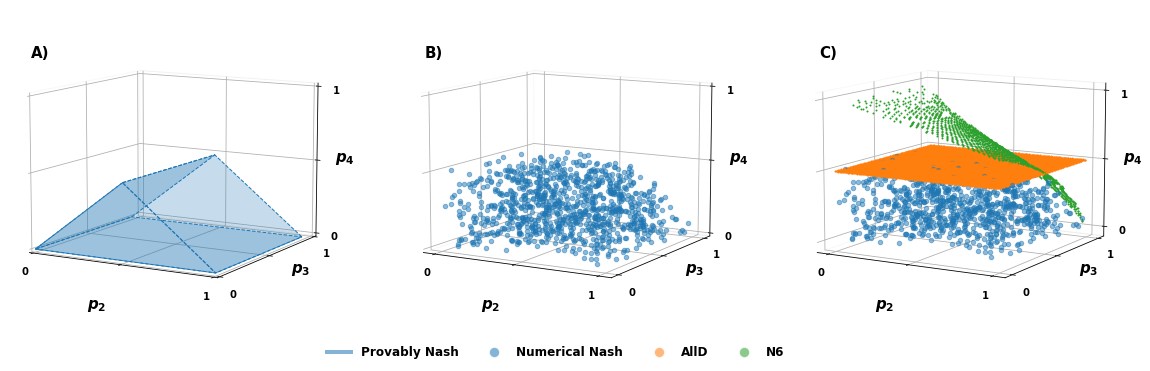

In [130]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

    
v = np.array([[0, 0, 0], [0, .9, 0], [1, 0, 0],  [1, .9, 0], [.5, 0, .5], [.5, .9, .5]])

verts = [[v[0], v[1], v[3], v[2]],
         [v[4], v[5], v[3], v[2]],
         [v[4], v[5], v[1], v[0]],
         [v[0], v[2], v[4], v[0]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))

for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates()[:1000].iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        ax3.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0], 
                             [Is6, Js6, Zs6]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax3.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax3.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
#                 label=labels[k],
                color=colors[k])
        
for ax in axes:

#     ax.view_init(10, -70)
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax3.legend(custom_lines, ['Provably Nash',
                          'Numerical Nash',
                          'AllD', 'N6'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);

plt.savefig("../static/two_bit_results.pdf", 
            transparent=True,  bbox_inches='tight')

### Results for the pd

In [82]:
import glob

columns = (["", "ID"] + [f'p{i+1}' for i in range(16)] + [f'q{i+1}' for i in range(16)] + 
           ['label', 'Sp', 'Sq', "condition A", "condition B",'c', 'b'])

files = glob.glob("../two_bit_reactive_pd/*csv")

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

df.to_csv("../two_bit_reactive_nash_pd.csv")

In [83]:
pd_df = pd.read_csv("../two_bit_reactive_nash_pd.csv", index_col=0)

In [102]:
eq, noneq = seperate_equilibria_and_non(pd_df)

In [103]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [104]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [105]:
flat_list = [item for sublist in sets for item in sublist]

counter = Counter(flat_list)

In [106]:
counter

Counter({'N7': 32387,
         'N0': 44223,
         'N1': 39486,
         'N2': 24275,
         'N3': 24496,
         'N4': 27277,
         'N5': 25176,
         'N6': 29575})

In [107]:
idx_sets = []

for i, j, k in list(itertools.combinations(labels, r=3)):
    index = [s for _, s in enumerate(sets) if (i not in list(s) and j not in list(s) and k not in list(s))]
    
    if len(index) == 0:
        idx_sets.append((i, j, k))

In [108]:
idx_sets

[('N0', 'N6', 'N7')]

In [109]:
[(i, s) for i, s in zip(ids, sets) if 'N7' not in s and 'N0' not in s and 'N6' not in s]

[]